In [1]:
import pandas as pd
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import numpy as np
import re
from wordcloud import WordCloud

In [2]:
file_path = "DATA/SBQ_CSV.csv"
data = pd.read_csv(file_path, delimiter=",", quotechar='"', on_bad_lines='skip')

Year
2019    1124
2024     764
Name: count, dtype: int64


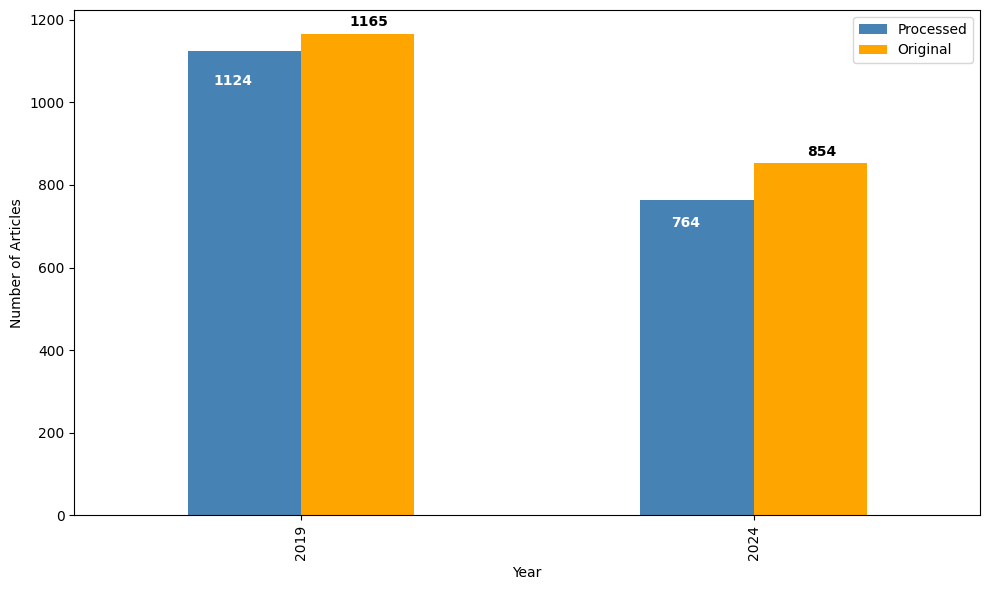

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Exemplo de dados reais processados
articles_per_year = data['Year'].value_counts().sort_index()
print(articles_per_year)

original_values = {2019: 1165, 2024: 854}

df = pd.DataFrame({
    'Processed': articles_per_year,
    'Original': pd.Series(original_values)
}).fillna(0)

df = df.sort_index()

ax = df.plot(kind='bar', figsize=(10, 6), color=['steelblue', 'orange'])

for i, (processed, original) in enumerate(zip(df['Processed'], df['Original'])):
    if processed > 0:
        ax.text(i - 0.15, processed - (processed * 0.05), str(int(processed)),
                ha='center', va='top', color='white', fontweight='bold')
    if original > 0:
        ax.text(i + 0.15, original + (original * 0.01), str(int(original)),
                ha='center', va='bottom', color='black', fontweight='bold')

plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.legend(['Processed', 'Original'])
plt.tight_layout()
plt.show()


In [ ]:
def remove_parentheses_content(text):
    return re.sub(r'\s*\(.*?\)', '', text)


#data = pd.read_csv(file_path, delimiter=",", quotechar='"', on_bad_lines='skip')
titles = data["English title"].dropna().astype(str)
titles = titles.apply(remove_parentheses_content)

def get_ngrams_sklearn(texts, n):
    vectorizer = CountVectorizer(ngram_range=(n, n), stop_words='english', token_pattern=r'\b\w+\b')
    X = vectorizer.fit_transform(texts)
    freqs = zip(vectorizer.get_feature_names_out(), X.sum(axis=0).tolist()[0])

    clean_freqs = {
        k: v for k, v in freqs
        if not any(re.fullmatch(r'\d+', token) for token in k.split())
    }

    return Counter(clean_freqs)

def plot_ngrams(ngram_counter, title, n=20):
    common_ngrams = ngram_counter.most_common(n)
    ngram_texts = [ngram for ngram, _ in common_ngrams]
    counts = [count for _, count in common_ngrams]
    
    plt.figure(figsize=(10, 5))
    bars = plt.barh(ngram_texts, counts, color='purple')
    
    for bar in bars:
        width = bar.get_width()
        plt.text(width/2, bar.get_y() + bar.get_height()/2,
                 f'{int(width)}',
                 ha='center', va='center',
                 color='white', fontweight='bold')
    
    plt.xlabel("Frequency")
    plt.ylabel("N-grams")
    plt.text(max(counts)*0.6, 18, title, fontsize=12, color='black', 
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'))
    plt.gca()
    plt.show()


def pltWordCloud(ngrams):
    n_gram = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(ngrams)

    plt.figure(figsize=(10, 5))
    plt.imshow(n_gram, interpolation='bilinear')
    plt.axis("off")
    plt.show()

def plot_comparison_bar(counts_a, counts_b, label_a="Year A", label_b="Year B",
                        bar_colors=("red", "purple"), title="Keyword Frequency Comparison", n=20):
    combined_keywords = (counts_a + counts_b).most_common(n)
    keywords = [k for k, _ in combined_keywords]

    
    df = pd.DataFrame({
        label_a: [counts_a.get(k, 0) for k in keywords],
        label_b: [counts_b.get(k, 0) for k in keywords]
    }, index=keywords)

    ax = df.plot(kind='barh', figsize=(10, 6), color=bar_colors)

   
    for i, keyword in enumerate(df.index):
        val_a = df.loc[keyword, label_a]
        val_b = df.loc[keyword, label_b]
        
        if val_a > 0:
            ax.text(val_a + 0.5, i - 0.15, str(val_a), color='white',
                    fontsize=9, ha='left', va='center', fontweight='bold',
                    bbox=dict(facecolor=bar_colors[0], edgecolor='none', boxstyle='round,pad=0.2'))
        
        if val_b > 0:
            ax.text(val_b + 0.5, i + 0.15, str(val_b), color='white',
                    fontsize=9, ha='left', va='center', fontweight='bold',
                    bbox=dict(facecolor=bar_colors[1], edgecolor='none', boxstyle='round,pad=0.2'))

    plt.xlabel("Frequency")
    plt.ylabel("Bigrams")
    #plt.title(title)
    plt.gca().invert_yaxis() 
    plt.tight_layout()
    plt.show()

Year
2019    1124
2024     764
Name: count, dtype: int64


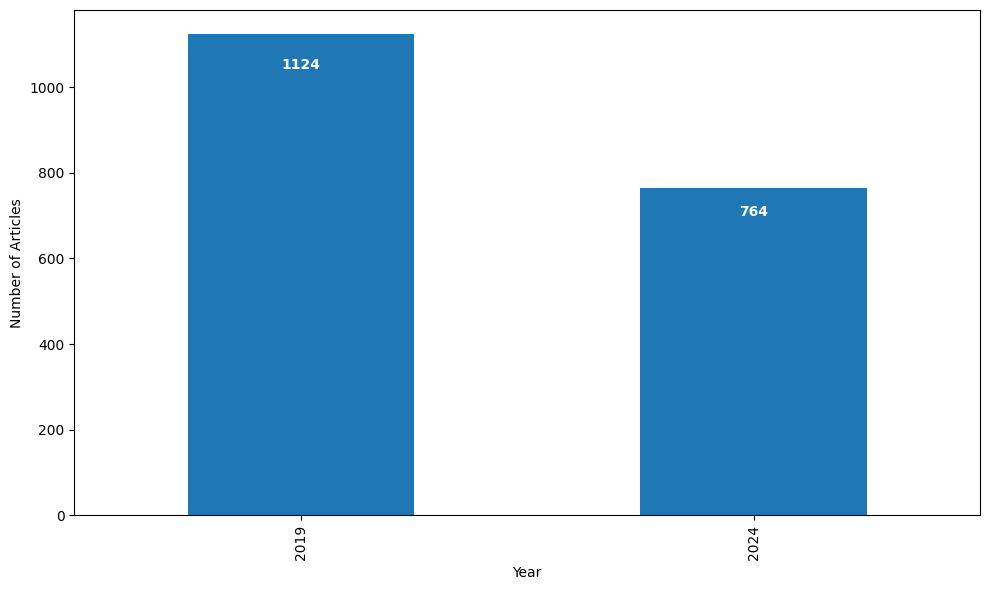

In [4]:
articles_per_year = data['Year'].value_counts().sort_index()
print(articles_per_year)

ax = articles_per_year.plot(kind='bar', figsize=(10, 6))
#articles_per_year.plot(kind='bar', figsize=(10, 6))
for i, value in enumerate(articles_per_year):
    ax.text(i, value - (value * 0.05),  # Coloca o texto um pouco abaixo do topo da barra
            str(value),
            ha='center', va='top', color='white', fontweight='bold')

plt.xlabel('Year')
plt.ylabel('Number of Articles')
#plt.title('Articles by Year')
plt.tight_layout()
plt.show()

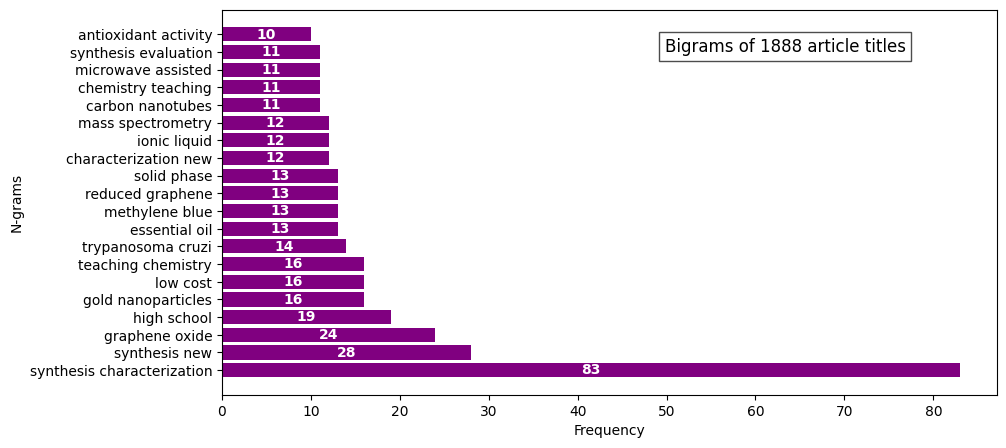

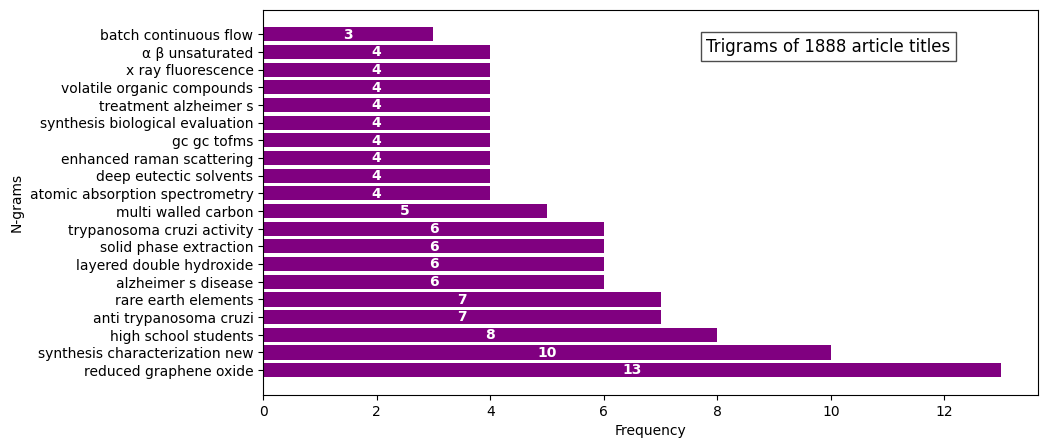

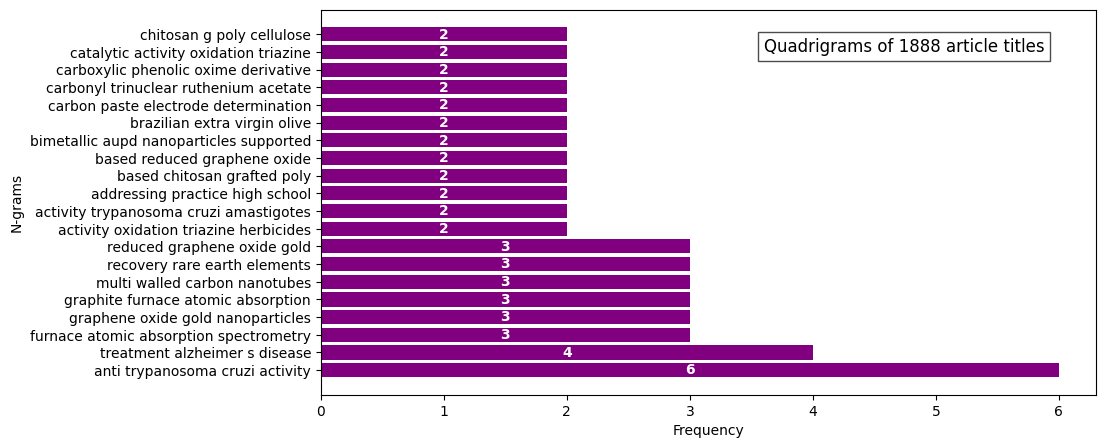

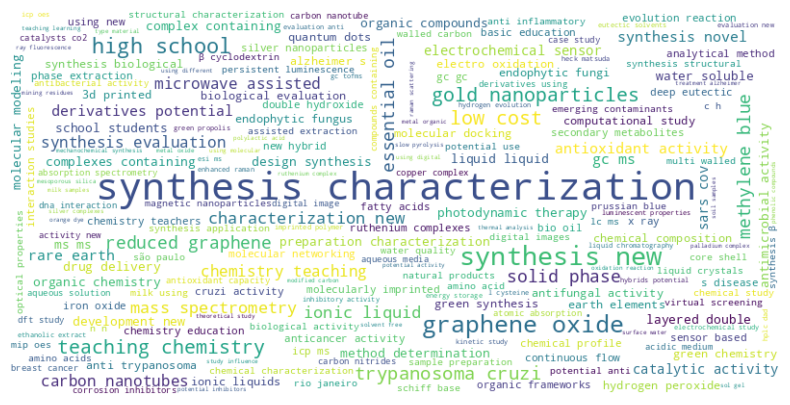

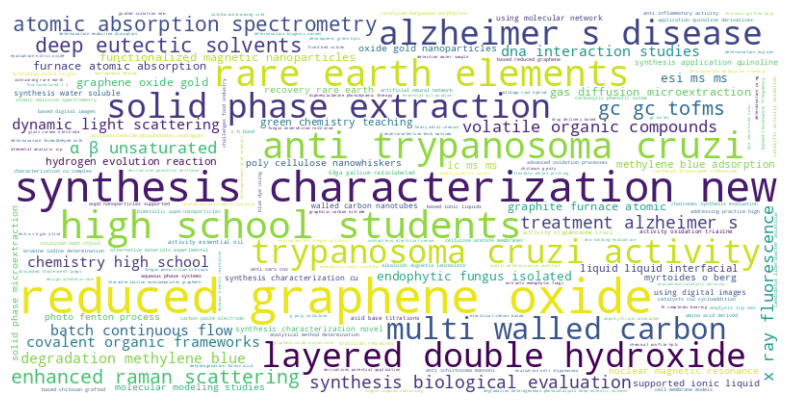

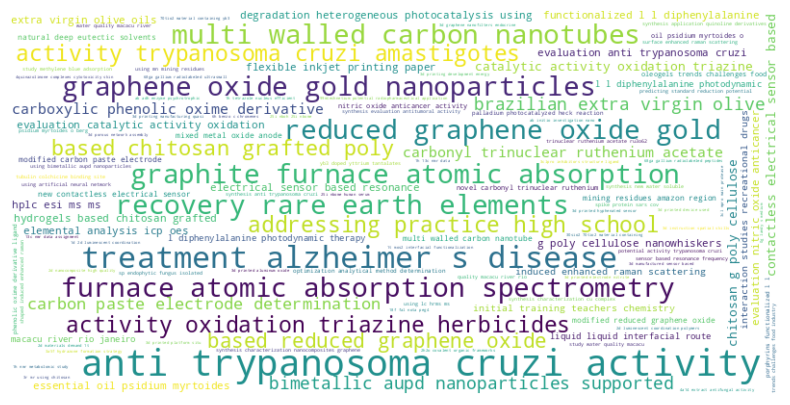

In [5]:
bigrams = get_ngrams_sklearn(titles, 2)
trigrams = get_ngrams_sklearn(titles, 3)
quagrams = get_ngrams_sklearn(titles, 4)

plot_ngrams(bigrams, "Bigrams of 1888 article titles")
plot_ngrams(trigrams, "Trigrams of 1888 article titles")
plot_ngrams(quagrams, "Quadrigrams of 1888 article titles")

pltWordCloud(bigrams)
pltWordCloud(trigrams)
pltWordCloud(quagrams)

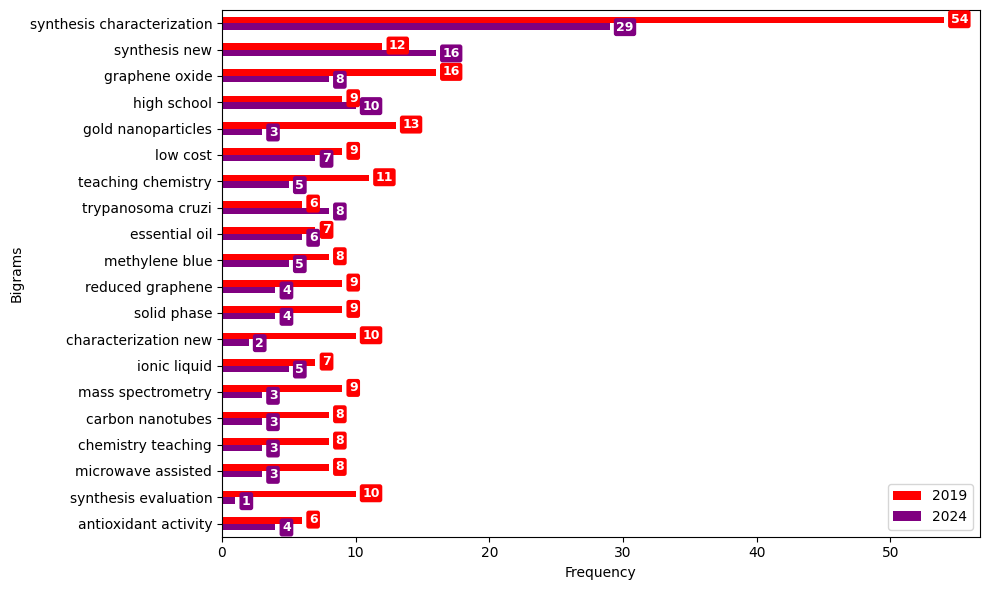

In [ ]:
data_2019 = data[data['Year'] == 2019]
data_2019 = data_2019["English title"].dropna().astype(str).apply(remove_parentheses_content)
#titles = titles.apply(remove_parentheses_content)
#print(data_2019 )

data_2024 = data[data['Year'] == 2024]
data_2024 = data_2024["English title"].dropna().astype(str).apply(remove_parentheses_content)

plot_comparison_bar(
    counts_a=get_ngrams_sklearn(data_2019,2),
    counts_b=get_ngrams_sklearn(data_2024,2),
    label_a="2019",
    label_b="2024",
    #title="Keyword Frequency Comparison: 2019 vs 2024"
)

In [ ]:
import csv

FundingInstituition_counts_2019 = dict(get_ngrams_sklearn(data_2019,2))
FundingInstituition_counts_2024 = dict(get_ngrams_sklearn(data_2024,2))
total_2019 = sum(FundingInstituition_counts_2019.values())
total_2024 = sum(FundingInstituition_counts_2024.values())

all_areas = sorted(list(set(FundingInstituition_counts_2019.keys()) | set(FundingInstituition_counts_2024.keys())))

csv_rows = []
csv_rows.append(['Area Code', '2019 Count', '2019 Percentage (%)', '2024 Count', '2024 Percentage (%)', 'Percentage Change (2019 to 2024)'])

for area in all_areas:
    count_2019 = FundingInstituition_counts_2019.get(area, 0)
    count_2024 = FundingInstituition_counts_2024.get(area, 0)

    percentage_2019 = (count_2019 / total_2019 * 100) if total_2019 > 0 else 0
    percentage_2024 = (count_2024 / total_2024 * 100) if total_2024 > 0 else 0

    percentage_change = percentage_2024 - percentage_2019

    csv_rows.append([
        area,
        count_2019,
        f"{percentage_2019:.2f}", 
        count_2024,
        f"{percentage_2024:.2f}",
        f"{percentage_change:.2f}"
    ])


output_filename = 'research_Title_comparison.csv'


with open(output_filename, 'w', newline='', encoding='utf-8') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerows(csv_rows)

print(f"CSV file '{output_filename}' created successfully!")
print(f"Total abstracts in 2019: {total_2019}")
print(f"Total abstracts in 2024: {total_2024}")



CSV file 'research_Title_comparison.csv' created successfully!
Total abstracts in 2019: 9207
Total abstracts in 2024: 6524
